 **Presenting Pakistan Food Prices Data of Last 5 Years**



Data of Food prices in Pakistan, distributed against states of country with 6 major food categories and duration ranging from 2013 to 2018.

Source: https://data.world/wfp/125455ff-c8a8-4f4b-9190-bf0e84559dc7

Presenter: Imran Ahmed

Key factors existing in data: Year, States, Food category and Price.![alt text](https://previews.123rf.com/images/achirathep/achirathep1806/achirathep180600034/103295617-double-exposure-of-hand-use-coins-of-thailand-and-stock-market-or-financial-graph-for-financial-inve.jpg))

How the food prices got Inflated and deflated across different states?

Does Purchasing Power Parity (PPP) data graph correlates with food prices Inflation / Deflation rate?

How are the major food products got Inflation and Deflation in prices through out the Years?

Purchasing Power Parity (PPP) Data of last 10 years taken from : https://knoema.com/atlas/Pakistan/GDP-based-on-PPP

![alt text](https://cdn.ruled.me/wp-content/uploads/2013/11/list-keto-foods-examples.jpg)

**Story line**:
PPP is the strength of country local public buying power of goods for their survival. Foods are considered one of the key factors for the survival of our lives. Inflation is the increment of prices and deflation is the decrement happen in product prices. In this data we will review the trends of increase and decrease of prices segregated across different states of country. Also, we will have a look on comparison of different product categories and their prices. And we will see all statistics compared with actual PPP of the country. 

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
sns.set(color_codes=True)


pd.options.mode.chained_assignment = None  # default='warn'

Renaming for understanding

In [60]:
df_dtype = (
    
    pd.read_csv('pakistan-food-median-prices-2.csv')
   #.set_index('Reported by')
   #.convert_dtypes()
   .rename(columns = {'adm1id' : 'Admin_ID1'})
   .rename(columns = {'admname' : 'Province'})
   .rename(columns = {'category' : 'Food_Category'})
   .rename(columns = {'cmname' : 'Food_name'})
   .rename(columns = {'cmnameshort' : 'Food'})
   .rename(columns = {'interpolated' : 'Interpolated'})
   .rename(columns = {'currency' : 'Currency'})
   .rename(columns = {'price' : 'Price'})
   .rename(columns = {'unit' : 'Unit'})
   .rename(columns = {'year' : 'Year_target'})
   .astype({'Interpolated': str})
)

df_dtype.tail()

,Admin_ID1,Province,Food_Category,catid,cmid,Food_name,Food,country,Currency,date,default,Interpolated,label,mktid,mktname,Price,ptid,scaling,sn,umid,Unit,x,Year_target
920,2276.0,Punjab,cereals and tubers,1,58,Wheat flour - Retail,Wheat flour,Pakistan,PKR,2018-04-15,1.0,0.0,Wheat flour - Retail (KG),291.0,Lahore,38.0,15.0,1.0,291_58_15_5,5.0,KG,1.523750e+09,2018.0
921,2276.0,Punjab,cereals and tubers,1,58,Wheat flour - Retail,Wheat flour,Pakistan,PKR,2018-05-15,1.0,0.0,Wheat flour - Retail (KG),291.0,Lahore,36.375,15.0,1.0,291_58_15_5,5.0,KG,1.526342e+09,2018.0
922,2275.0,Khyber Pakhtunkhwa,cereals and tubers,1,58,Wheat flour - Retail,Wheat flour,Pakistan,PKR,2018-06-15,1.0,0.0,Wheat flour - Retail (KG),294.0,Peshawar,36.9,15.0,1.0,294_58_15_5,5.0,KG,1.529021e+09,2018.0
923,2276.0,Punjab,cereals and tubers,1,58,Wheat flour - Retail,Wheat flour,Pakistan,PKR,2018-07-15,1.0,0.0,Wheat flour - Retail (KG),291.0,Lahore,39.0,15.0,1.0,291_58_15_5,5.0,KG,1.531613e+09,2018.0
924,2275.0,Khyber Pakhtunkhwa,cereals and tubers,1,58,Wheat flour - Retail,Wheat flour,Pakistan,PKR,2018-08-15,1.0,0.0,Wheat flour - Retail (KG),294.0,Peshawar,39.167,15.0,1.0,294_58_15_5,5.0,KG,1.534291e+09,2018.0


In [61]:
dd = df_dtype[['Interpolated']]
dd.drop_duplicates

<bound method DataFrame.drop_duplicates of     Interpolated
0            nan
1            1.0
2            1.0
3            1.0
4            1.0
..           ...
920          0.0
921          0.0
922          0.0
923          0.0
924          0.0

[925 rows x 1 columns]>

Hiding interpolated Data

In [63]:
df_non_interpolate = df_dtype["Interpolated"] == "0.0"
df_dtype.where(df_non_interpolate, inplace = True)
df_dtype.tail()


,Admin_ID1,Province,Food_Category,catid,cmid,Food_name,Food,country,Currency,date,default,Interpolated,label,mktid,mktname,Price,ptid,scaling,sn,umid,Unit,x,Year_target
920,2276.0,Punjab,cereals and tubers,1,58,Wheat flour - Retail,Wheat flour,Pakistan,PKR,2018-04-15,1.0,0.0,Wheat flour - Retail (KG),291.0,Lahore,38.0,15.0,1.0,291_58_15_5,5.0,KG,1.523750e+09,2018.0
921,2276.0,Punjab,cereals and tubers,1,58,Wheat flour - Retail,Wheat flour,Pakistan,PKR,2018-05-15,1.0,0.0,Wheat flour - Retail (KG),291.0,Lahore,36.375,15.0,1.0,291_58_15_5,5.0,KG,1.526342e+09,2018.0
922,2275.0,Khyber Pakhtunkhwa,cereals and tubers,1,58,Wheat flour - Retail,Wheat flour,Pakistan,PKR,2018-06-15,1.0,0.0,Wheat flour - Retail (KG),294.0,Peshawar,36.9,15.0,1.0,294_58_15_5,5.0,KG,1.529021e+09,2018.0
923,2276.0,Punjab,cereals and tubers,1,58,Wheat flour - Retail,Wheat flour,Pakistan,PKR,2018-07-15,1.0,0.0,Wheat flour - Retail (KG),291.0,Lahore,39.0,15.0,1.0,291_58_15_5,5.0,KG,1.531613e+09,2018.0
924,2275.0,Khyber Pakhtunkhwa,cereals and tubers,1,58,Wheat flour - Retail,Wheat flour,Pakistan,PKR,2018-08-15,1.0,0.0,Wheat flour - Retail (KG),294.0,Peshawar,39.167,15.0,1.0,294_58_15_5,5.0,KG,1.534291e+09,2018.0


Showing shape to demonstrate the size of Data Frame

In [64]:
df_dtype.shape

(925, 23)

Data type conversion for mathametical operations

In [65]:
df_dtype_conv = (
    
    df_dtype
    .astype({'Year_target': float})
    .astype({'Price': float})
)
 
df_dtype_conv.tail()

,Admin_ID1,Province,Food_Category,catid,cmid,Food_name,Food,country,Currency,date,default,Interpolated,label,mktid,mktname,Price,ptid,scaling,sn,umid,Unit,x,Year_target
920,2276.0,Punjab,cereals and tubers,1,58,Wheat flour - Retail,Wheat flour,Pakistan,PKR,2018-04-15,1.0,0.0,Wheat flour - Retail (KG),291.0,Lahore,38.000,15.0,1.0,291_58_15_5,5.0,KG,1.523750e+09,2018.0
921,2276.0,Punjab,cereals and tubers,1,58,Wheat flour - Retail,Wheat flour,Pakistan,PKR,2018-05-15,1.0,0.0,Wheat flour - Retail (KG),291.0,Lahore,36.375,15.0,1.0,291_58_15_5,5.0,KG,1.526342e+09,2018.0
922,2275.0,Khyber Pakhtunkhwa,cereals and tubers,1,58,Wheat flour - Retail,Wheat flour,Pakistan,PKR,2018-06-15,1.0,0.0,Wheat flour - Retail (KG),294.0,Peshawar,36.900,15.0,1.0,294_58_15_5,5.0,KG,1.529021e+09,2018.0
923,2276.0,Punjab,cereals and tubers,1,58,Wheat flour - Retail,Wheat flour,Pakistan,PKR,2018-07-15,1.0,0.0,Wheat flour - Retail (KG),291.0,Lahore,39.000,15.0,1.0,291_58_15_5,5.0,KG,1.531613e+09,2018.0
924,2275.0,Khyber Pakhtunkhwa,cereals and tubers,1,58,Wheat flour - Retail,Wheat flour,Pakistan,PKR,2018-08-15,1.0,0.0,Wheat flour - Retail (KG),294.0,Peshawar,39.167,15.0,1.0,294_58_15_5,5.0,KG,1.534291e+09,2018.0


ScatterPlot showing distribution of Prices for Punjab

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(100.0, 200.0)

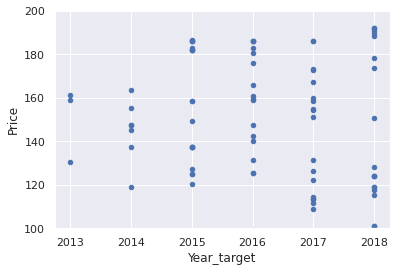

In [66]:
#required groups:
#Sindh
#Punjab
#Khyber Pakhtunkhwa
#Balochistan

df_Punjab = (
    df_dtype_conv
    .groupby('Province')
    .get_group('Punjab')
    #.groups
)

df_punjab_scatter = df_Punjab[['Price','Province','Year_target']].sort_values(['Price'])
df_punjab_scatter.plot.scatter(x='Year_target',y='Price').set_ylim(100,200)


Box Plot showing distribution of Prices for Punjab

AttributeError: ignored

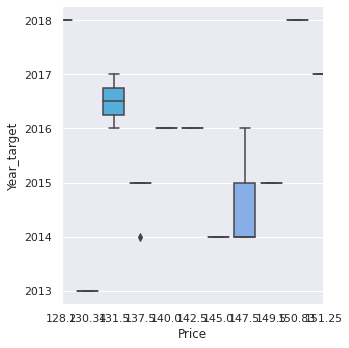

In [87]:
df_punjab_catplot = (
    df_punjab_scatter.astype({'Year_target': int})
    .astype({'Price': float})
)
#df_punjab_catplot
ax = sns.catplot(y='Year_target',x='Price', kind="box", estimator=np.median, data=df_punjab_scatter )#.set_xlim(0,5)
ax.set(xlim=(85, 95))
ax.add_legend(loc='upper right');


Violin Plot showing distribution of Prices for Punjab

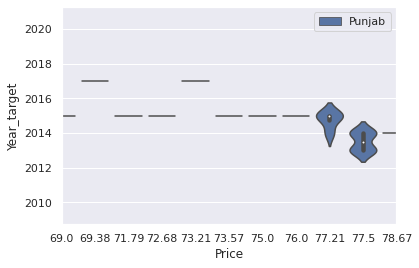

In [89]:
#50,60

df_punjab_violin = sns.violinplot(y='Year_target',x='Price' ,  data=df_punjab_scatter, hue = "Province" , order=None, hue_order=None, 
bw='scott', cut=2, scale='area', scale_hue=True, gridsize=50, width=0.8, 
inner='box', split=False, dodge=True, orient=None, linewidth=None, 
color=None, palette=None, saturation=0.75, ax=None).set_xlim(50,60)

df_punjab_violin
plt.legend(loc='upper right')


Making dataframes for Rest of the states for combing them into 1 Major Data Frame

In [90]:
df_Sindh = (
    
    df_dtype_conv
    .groupby('Province')
    .get_group('Sindh')
    #.groups
)

df_Sindh_scatter = df_Sindh[['Price','Province','Year_target']].sort_values(['Price'])

df_KPK = (
    
    df_dtype_conv
    .groupby('Province')
    .get_group('Khyber Pakhtunkhwa')
    #.groups
)

df_KPK_scatter = df_KPK[['Price','Province','Year_target']].sort_values(['Price'])

df_Balochistan = (
    
    df_dtype_conv
    .groupby('Province')
    .get_group('Balochistan')
    #.groups
)

df_Balochistan_scatter = df_Balochistan[['Price','Province','Year_target']].sort_values(['Price'])

#df_Sindh_scatter
#df_punjab_scatter
#df_KPK_scatter
#df_Balochistan_scatter

result = pd.concat([df_Sindh_scatter,df_punjab_scatter,df_KPK_scatter,df_Balochistan_scatter])
result.head().reset_index

<bound method DataFrame.reset_index of      Price Province  Year_target
722  12.00    Sindh       2018.0
829  35.60    Sindh       2016.0
628  43.31    Sindh       2015.0
629  43.31    Sindh       2016.0
630  43.31    Sindh       2016.0>

Violin plot of price distribution of the country

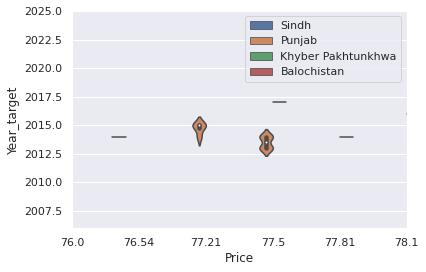

In [70]:
import matplotlib.pyplot as plt
#200,205
#338,342

df_All_violin = sns.violinplot(y='Year_target',x='Price' ,  data = result, hue = "Province" , order=None, hue_order=None, 
bw='scott', cut=2, scale='area', scale_hue=True, gridsize=50, width=0.8, 
inner='box', split=False, dodge=True, orient=None, linewidth=None, 
color=None, palette=None, saturation=0.75, ax=None).set_xlim(200,205)

df_All_violin
plt.legend(loc='upper right')

Filtering data with most needed fields

In [71]:
df_state_food = df_dtype_conv[['Province','Food_Category','Year_target','Price']]
df_state_food.tail()

,Province,Food_Category,Year_target,Price
920,Punjab,cereals and tubers,2018.0,38.000
921,Punjab,cereals and tubers,2018.0,36.375
922,Khyber Pakhtunkhwa,cereals and tubers,2018.0,36.900
923,Punjab,cereals and tubers,2018.0,39.000
924,Khyber Pakhtunkhwa,cereals and tubers,2018.0,39.167


Grouping the whole data set for demonstration

In [72]:
group1 = df_state_food.groupby(['Province','Food_Category','Year_target','Price']).size()
df_st_fc_Y = pd.DataFrame(group1)
df_st_fc_Y.head()

0
Province    Food_Category      Year_target Price   
Balochistan cereals and tubers 2013.0      36.50  1
                                           40.25  1
                                           75.00  4
                               2014.0      41.00  1
                                           50.00  2

Histogram plot

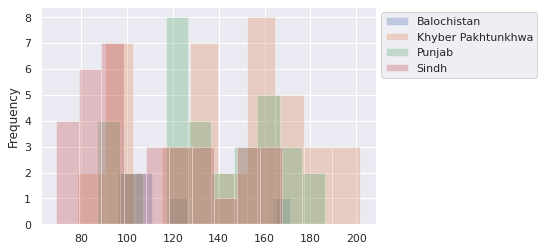

In [73]:
df_st_food_filter = df_state_food
df_filter1 = (df_st_food_filter['Food_Category'] == "meat, fish and eggs")
df_st_food_filter.where(df_filter1, inplace = True)

plot11 = df_st_food_filter.groupby(['Province']).Price.plot(kind="hist", alpha=0.3);
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1));



Lineplot for state Punjab

Text(0.5, 0, 'Years ascending from left to right, Showing for Groups of state Punjab')

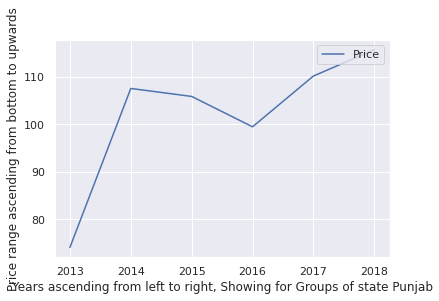

In [75]:
df_state_food = df_dtype_conv[['Province','Food_Category','Year_target','Price']]
df_punjab_filter = df_state_food
df_filter2 = (df_punjab_filter['Province'] == "Punjab")
df_punjab_filter.where(df_filter2, inplace = True)
Punjab_mean = df_punjab_filter.groupby('Year_target').Price.mean()

plot12 = Punjab_mean.plot.line()
plt.legend(loc='upper right')
plot12.set_ylabel('Price range ascending from bottom to upwards')
plot12.set_xlabel('Years ascending from left to right, Showing for Groups of state Punjab')



Lineplot for state Sindh

Text(0.5, 0, 'Years ascending from left to right, Showing for Groups of state Sindh')

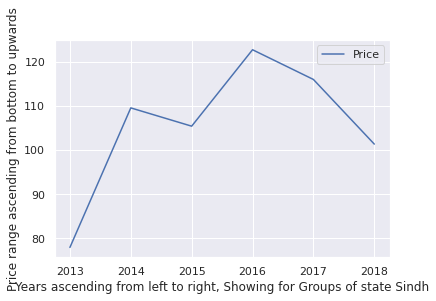

In [76]:
df_state_food = df_dtype_conv[['Province','Food_Category','Year_target','Price']]
df_sindh_filter = df_state_food
df_filter3 = (df_sindh_filter['Province'] == "Sindh")
df_sindh_filter.where(df_filter3, inplace = True)
Sindh_mean = df_sindh_filter.groupby('Year_target').Price.mean()

plot13 = Sindh_mean.plot.line()
plt.legend(loc='upper right')
plot13.set_ylabel('Price range ascending from bottom to upwards')
plot13.set_xlabel('Years ascending from left to right, Showing for Groups of state Sindh')

Lineplot for state Khyber Pakhtunkhwa

Text(0.5, 0, 'Years ascending from left to right, Showing for Groups of state Khyber Pakhtunkhwa')

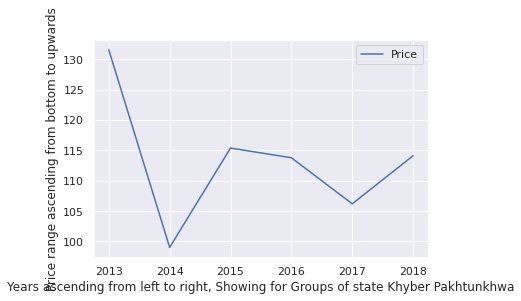

In [77]:
df_state_food = df_dtype_conv[['Province','Food_Category','Year_target','Price']]
df_kpk_filter = df_state_food
df_filter4 = (df_kpk_filter['Province'] == "Khyber Pakhtunkhwa")
df_kpk_filter.where(df_filter4, inplace = True)
kpk_mean = df_kpk_filter.groupby('Year_target').Price.mean()

plot14 = kpk_mean.plot.line()
plt.legend(loc='upper right')
plot14.set_ylabel('Price range ascending from bottom to upwards')
plot14.set_xlabel('Years ascending from left to right, Showing for Groups of state Khyber Pakhtunkhwa')

Lineplot for state Balochistan

Text(0.5, 0, 'Years ascending from left to right, Showing for Groups of state Balochistan')

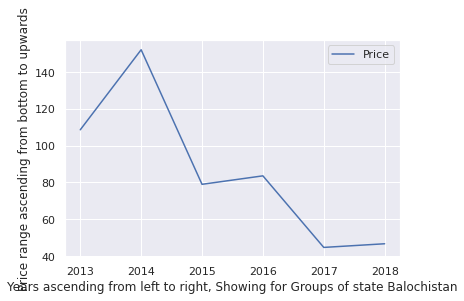

In [78]:
df_state_food = df_dtype_conv[['Province','Food_Category','Year_target','Price']]
df_bal_filter = df_state_food
df_filter5 = (df_bal_filter['Province'] == "Balochistan")
df_bal_filter.where(df_filter5, inplace = True)
bal_mean = df_bal_filter.groupby('Year_target').Price.mean()

plot15 = bal_mean.plot.line()
plt.legend(loc='upper right')
plot15.set_ylabel('Price range ascending from bottom to upwards')
plot15.set_xlabel('Years ascending from left to right, Showing for Groups of state Balochistan')

Lineplot of All the Dataset segregated across all Years duration.

Text(0.5, 0, 'Years ascending from left to right, Showing for Groups of All of the states')

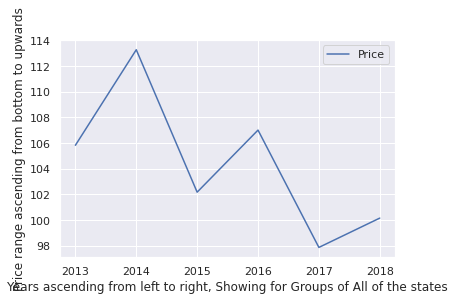

In [79]:
df_state_food = df_dtype_conv[['Year_target','Price']]

bal_mean = df_state_food.groupby('Year_target').Price.mean()

plot16 = bal_mean.plot.line()
plt.legend(loc='upper right')
plot16.set_ylabel('Price range ascending from bottom to upwards')
plot16.set_xlabel('Years ascending from left to right, Showing for Groups of All of the states')

Purchasing Power parity (PPP) statistics distributed for last 10 years

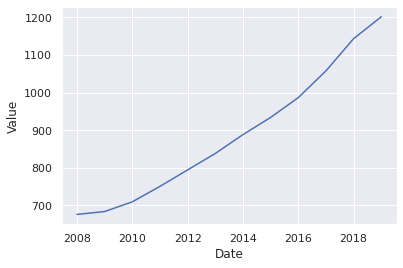

In [80]:
df_PPP = pd.read_html("https://knoema.com/atlas/Pakistan/GDP-based-on-PPP", header=0)[0][["Date", "Value"]]
sns.lineplot(data=df_PPP,x="Date",y="Value")

Question 1

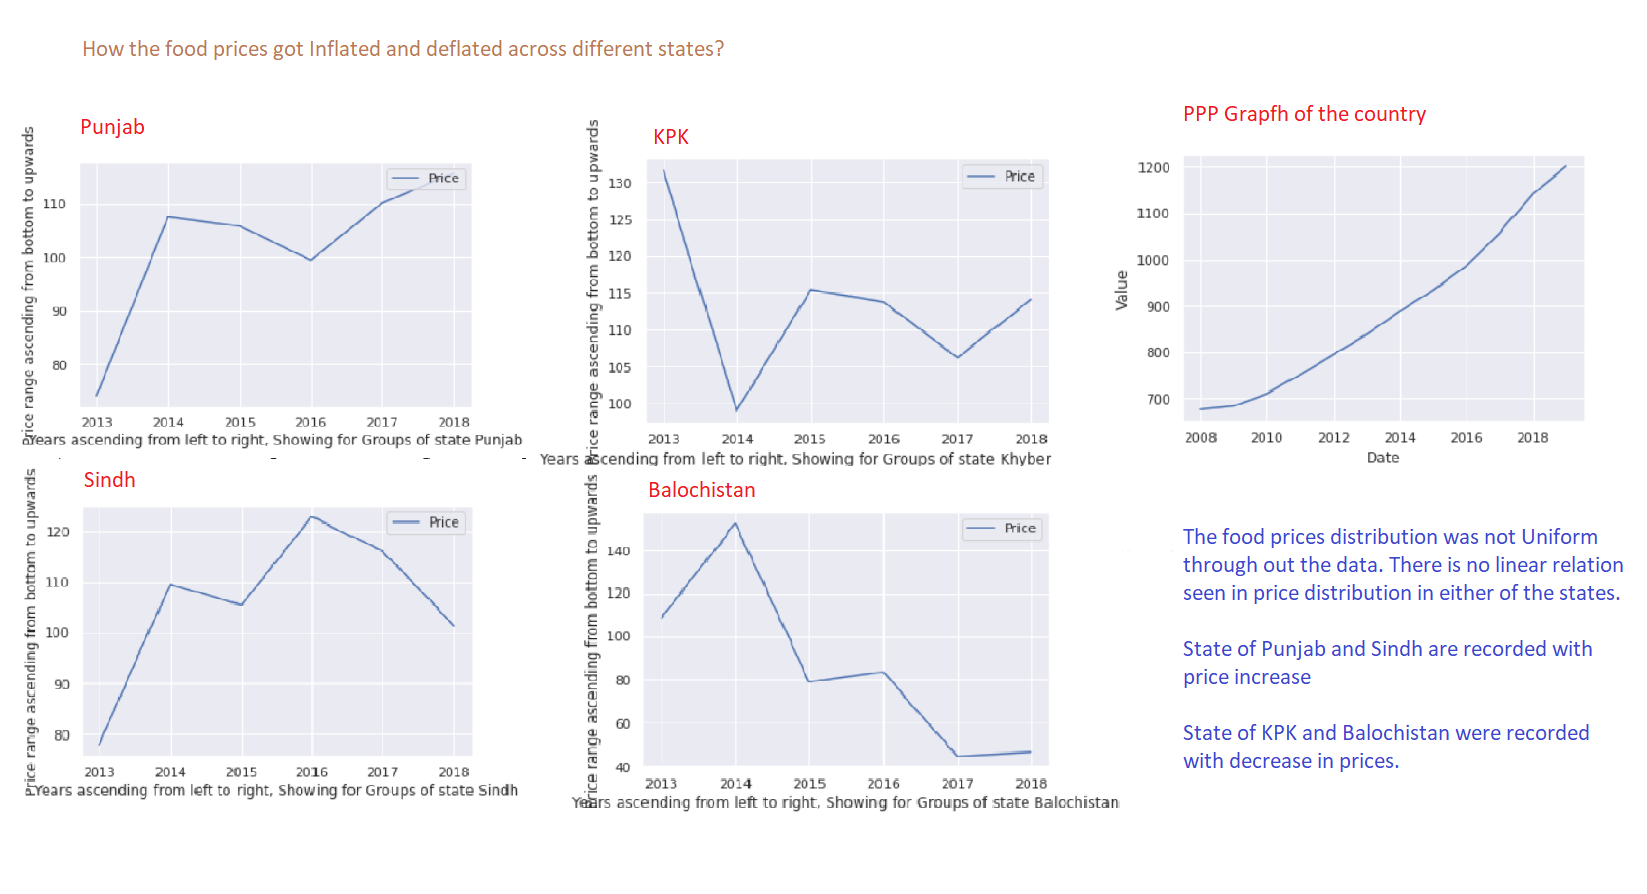

Question 2

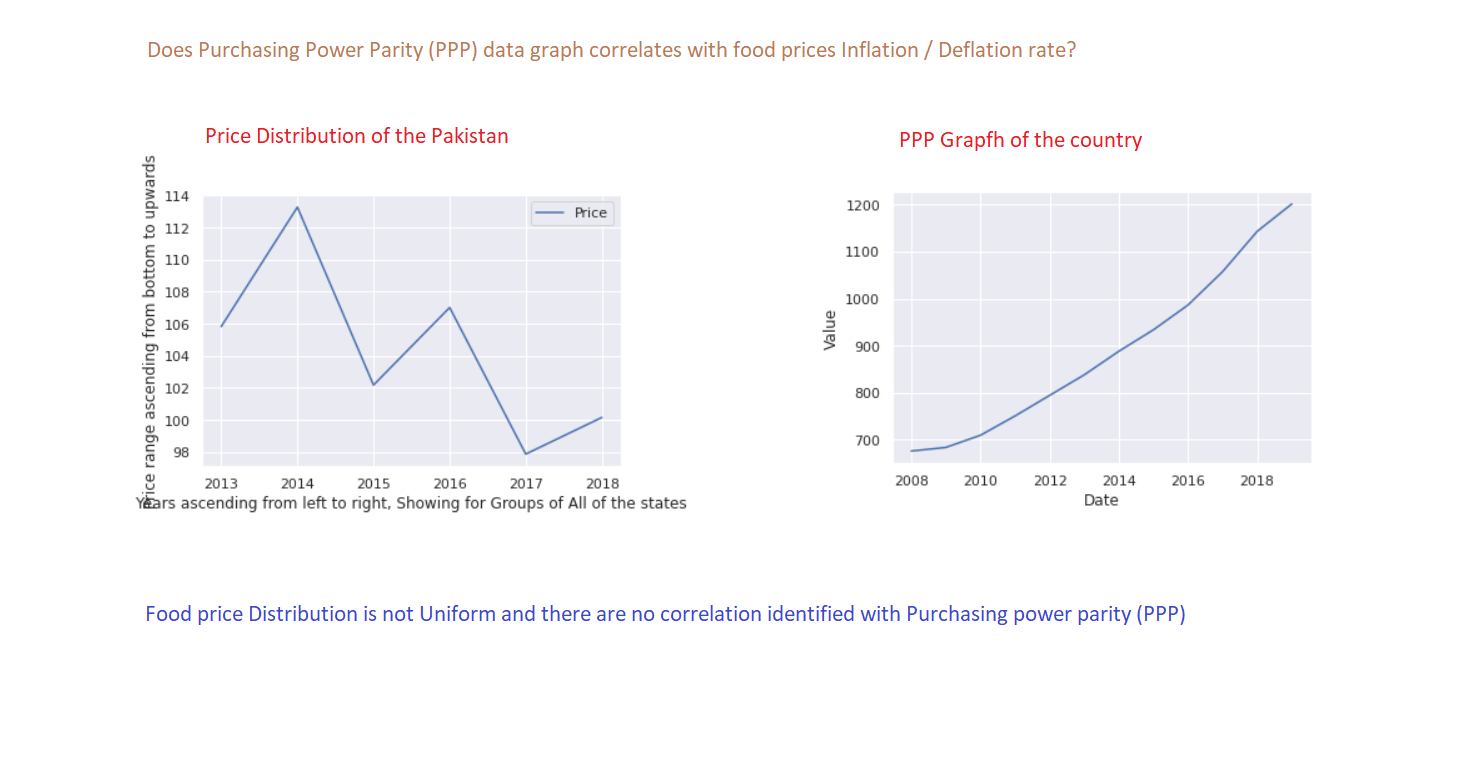

Histogram of Price Distribution against all Years, showingin Facet Grid of Staes x Food Category

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


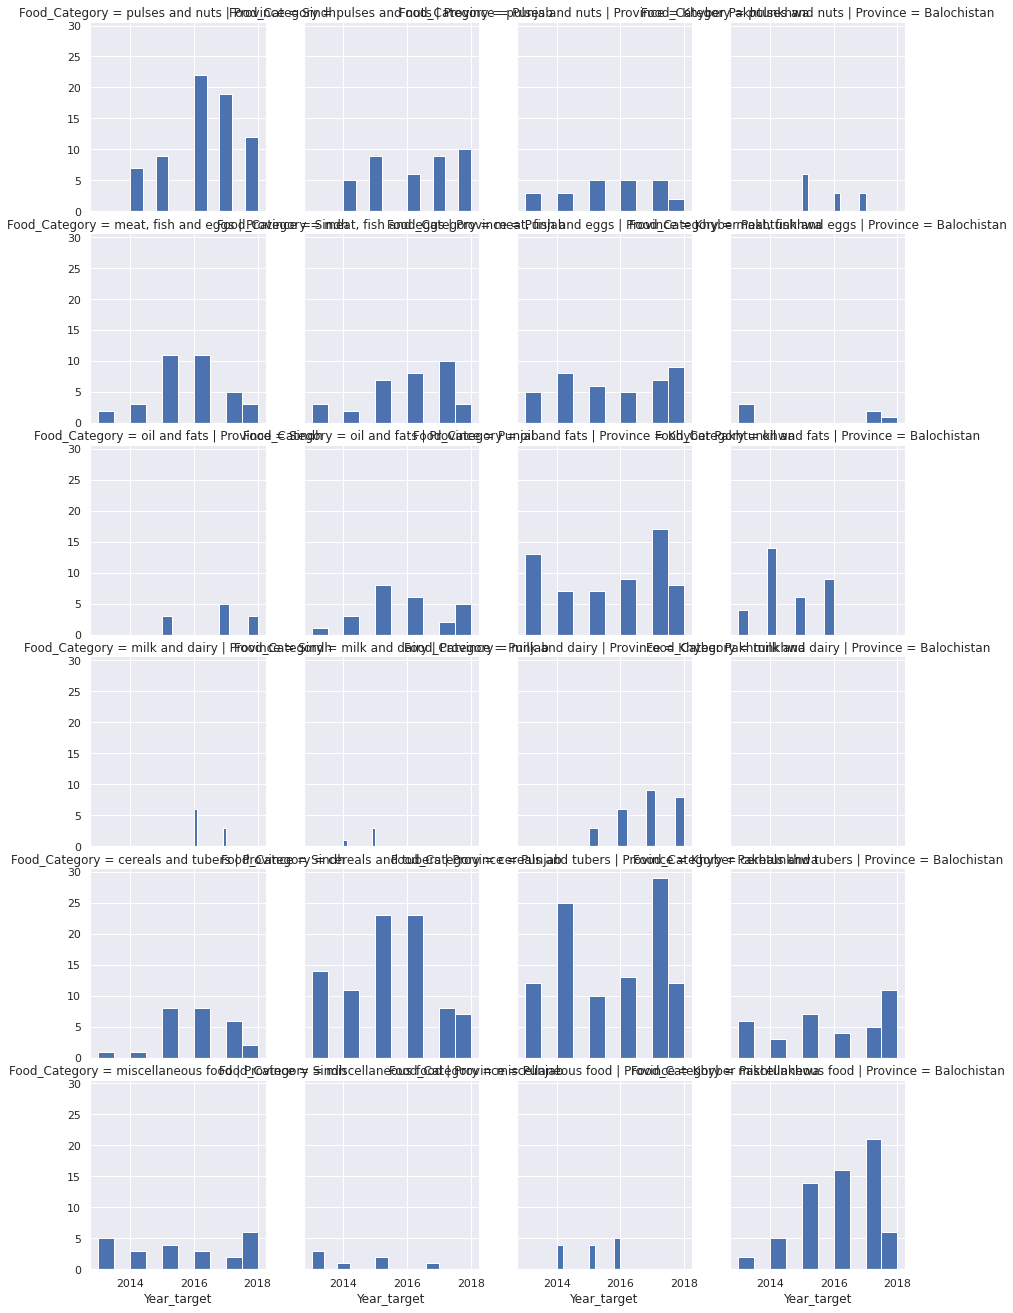

In [81]:
df_state_food = df_dtype_conv[['Province','Food_Category','Year_target','Price']]


h = sns.FacetGrid(df_state_food, row='Food_Category', col='Province')
h = h.map(plt.hist, 'Year_target' )
h.add_legend();

Scatter plot of Price Distribution against all Years, showingin Facet Grid of Staes x Food Category

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


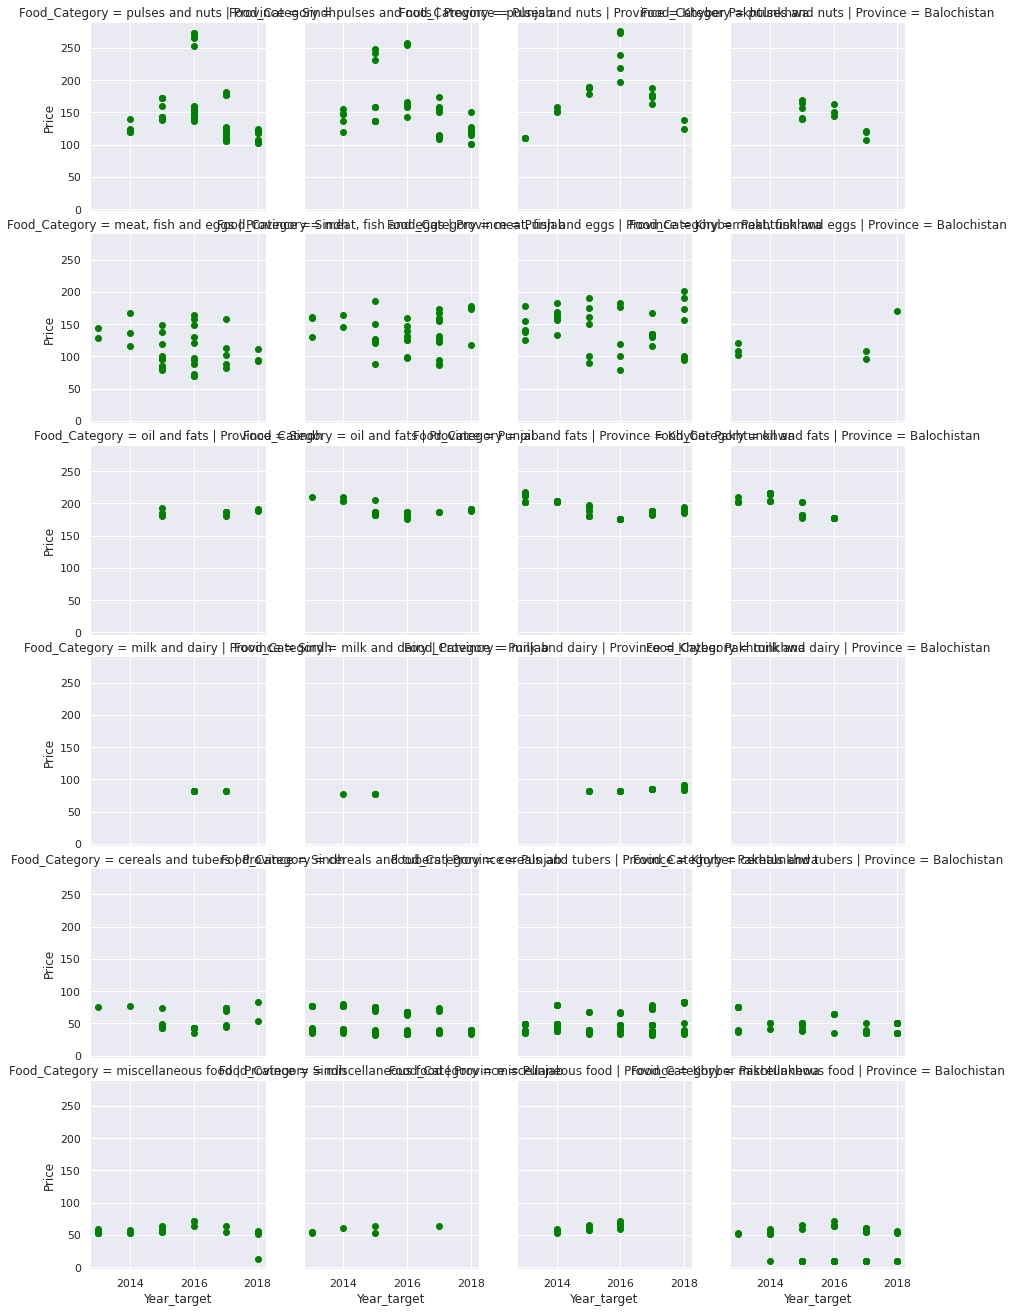

In [82]:
df_state_food = df_dtype_conv[['Province','Food_Category','Year_target','Price']]

x = sns.FacetGrid(df_state_food, row='Food_Category', col='Province')
x = x.map(plt.scatter, 'Year_target' , 'Price' , color = 'green')
x.add_legend();

Lineplot of Price Distribution against all Years, showingin Facet Grid of Food Category populated with Hue of States

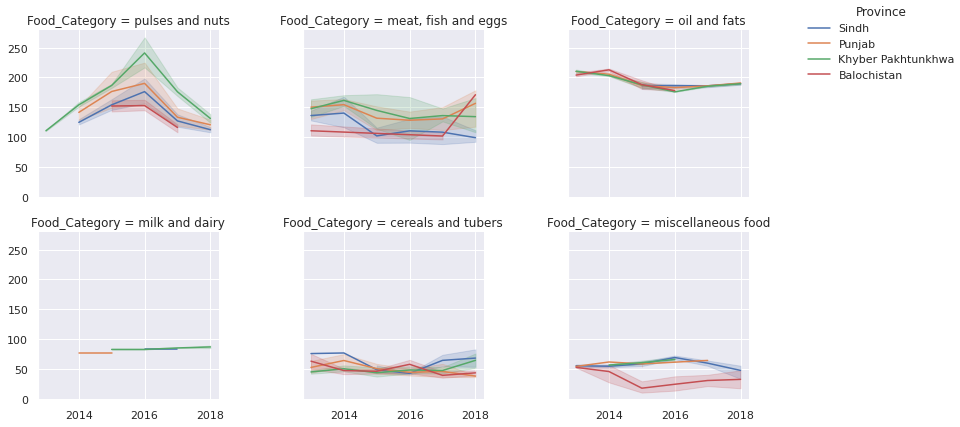

In [83]:
df_state_food = df_dtype_conv[['Province','Food_Category','Year_target','Price']]

x = sns.FacetGrid(df_state_food, col='Food_Category', hue='Province', col_wrap=3)
x.map_dataframe(sns.lineplot, x='Year_target' , y='Price')
x.add_legend(loc='upper right',bbox_to_anchor=(1.2,1));
plt.tight_layout();

Question 3

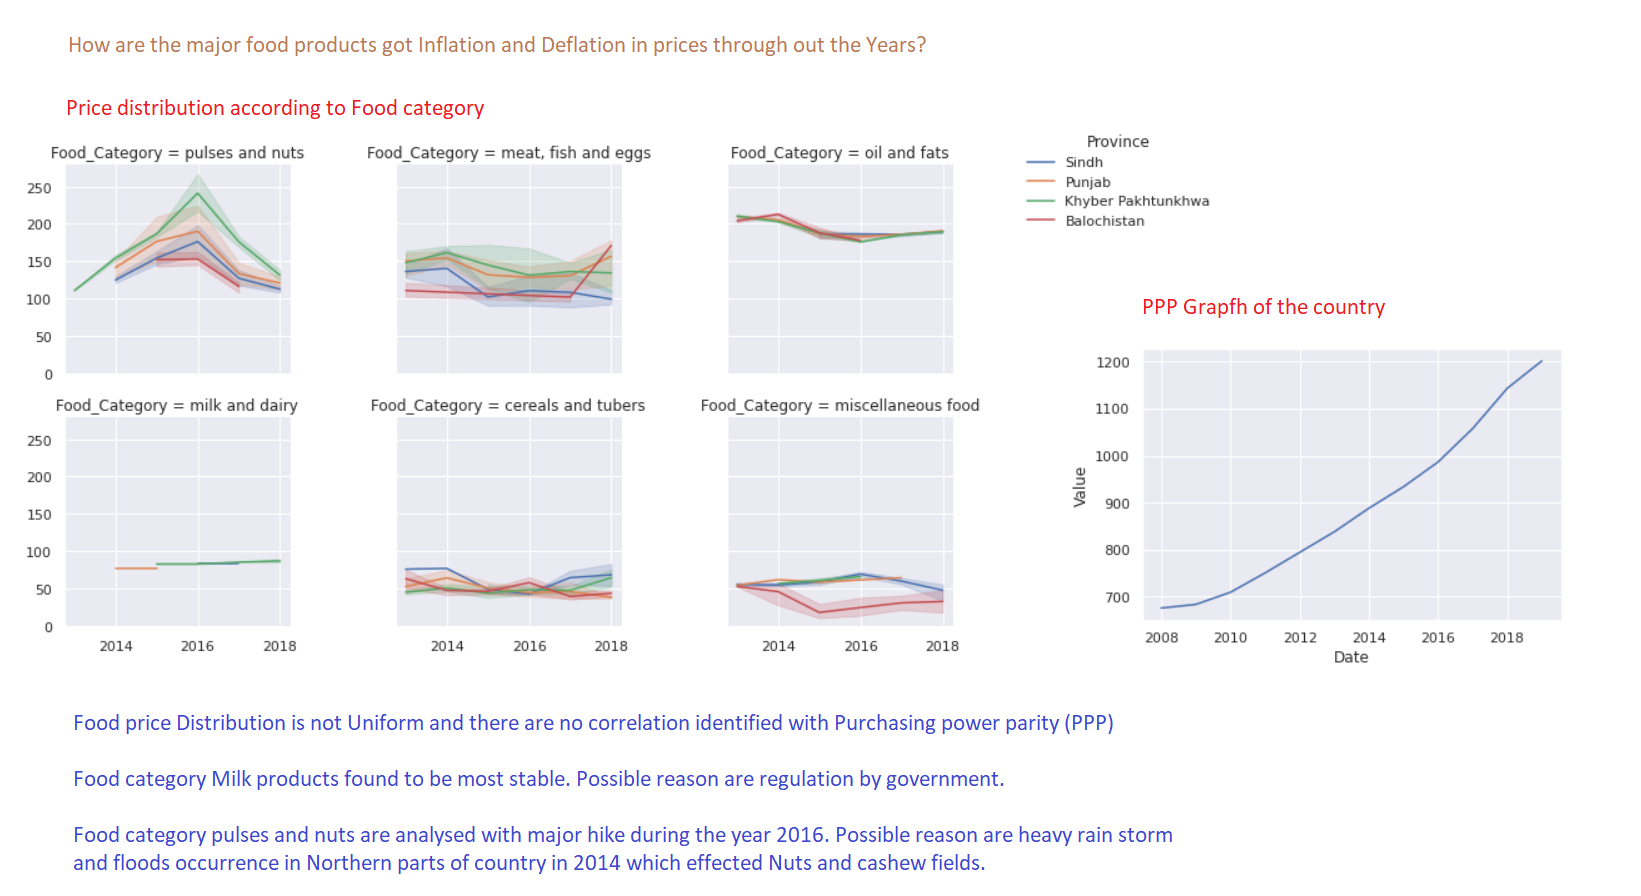

Lesson I Learned:

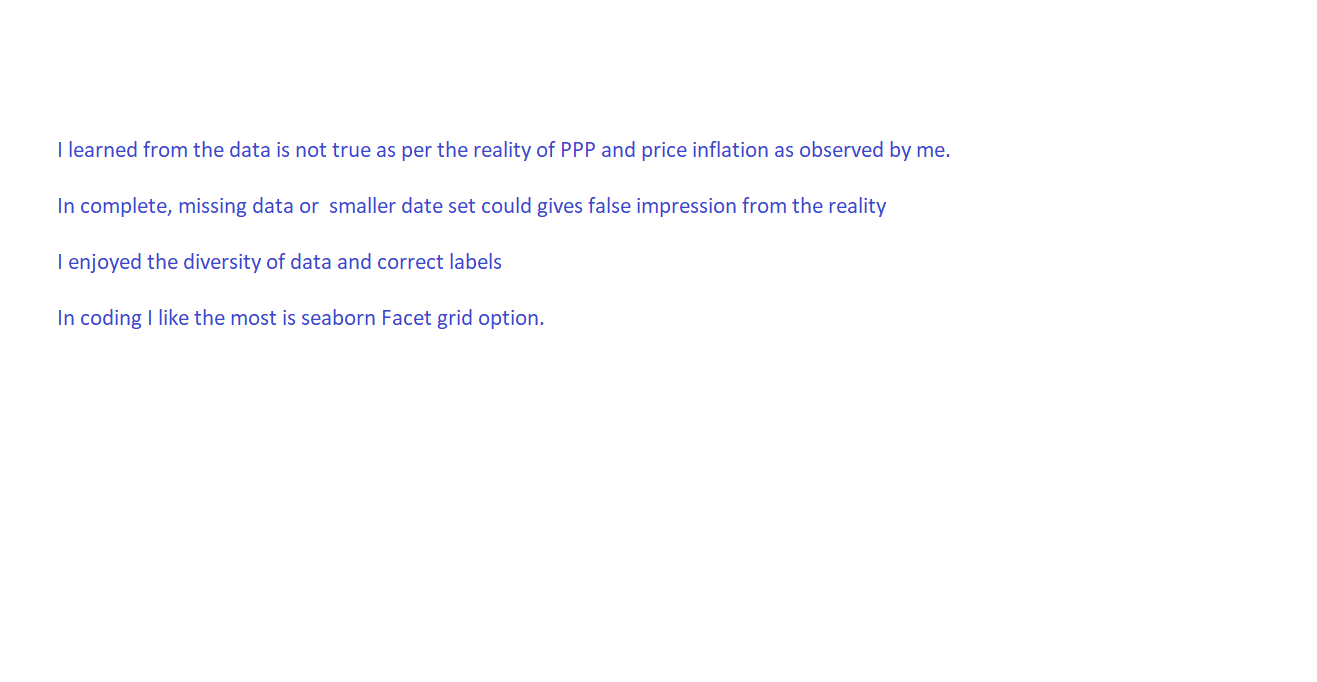